## **7. Elaboration of Nutri-Score model based on a machine learning classification model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Data

In [ ]:
data = pd.read_csv("data_nutri.csv")

## Splitting the data into test data and train data

In [ ]:

X = data.drop(["Nutri-Score","Brand","Category","Eco-Score"], axis=1)

y = data["Nutri-Score"]

y = y.str.upper()

# Encode target labels into numerical values (if not already encoded)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()

X_train[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]] = scaler.fit_transform(X_train[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]])
X_test[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]] = scaler.transform(X_test[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]])


In [ ]:
X_test.shape

(283, 8)

## Performing predictions with decision trees algorithm

In [ ]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]], y_train)

# Predict with Decision Tree
dt_predictions = dt_classifier.predict(X_test[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]])


## Performing prediction using XGBoost algorithm

In [ ]:
# Train an XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_classifier.fit(X_train[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]].values, y_train)

# Predict with XGBoost
xgb_predictions  = xgb_classifier.predict(X_test[["Energy (kcal)","Sugars (g)","Saturated Fat (g)","Salt (g)","Fiber (g)","Fiber (g)","Proteins (g)","Fruits/Vegetables (%)"]].values)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Obtained results
### 1. Decision Trees

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Decision Tree Classification Report:
              precision    recall  f1-score   support

           A       0.89      0.88      0.88       122
           B       0.60      0.70      0.64        53
           C       0.88      0.81      0.84        79
           D       0.84      0.78      0.81        27
           E       0.33      0.50      0.40         2

    accuracy                           0.81       283
   macro avg       0.71      0.73      0.72       283
weighted avg       0.82      0.81      0.82       283



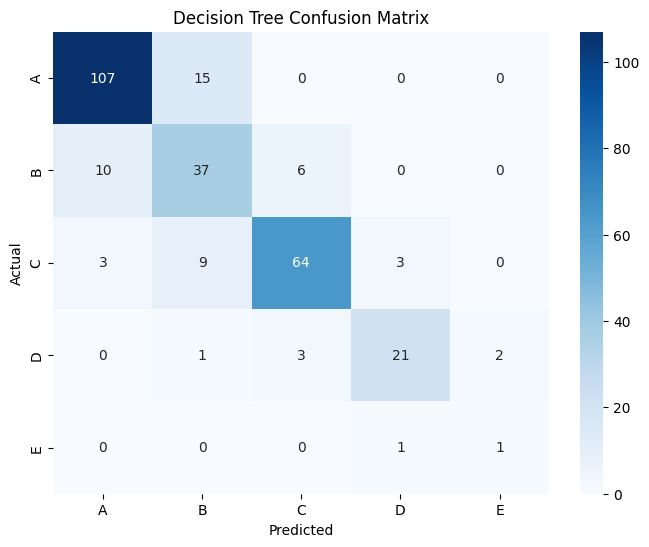

In [ ]:
# Labels for the confusion matrix
labels = label_encoder.classes_

# Decision Tree Results
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=labels))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, dt_predictions, title="Decision Tree Confusion Matrix", labels=labels)


In [ ]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, dt_predictions, target_names=labels, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
Dreport_df

,precision,recall,f1-score,support
A,0.891667,0.877049,0.884298,122.000000
B,0.596774,0.698113,0.643478,53.000000
C,0.876712,0.810127,0.842105,79.000000
D,0.840000,0.777778,0.807692,27.000000
E,0.333333,0.500000,0.400000,2.000000
accuracy,0.812721,0.812721,0.812721,0.812721
macro avg,0.707697,0.732613,0.715515,283.000000
weighted avg,0.823390,0.812721,0.816688,283.000000


### 2. XGBoost

XGBoost Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.93      0.95       122
           B       0.73      0.85      0.78        53
           C       0.91      0.87      0.89        79
           D       0.88      0.85      0.87        27
           E       1.00      0.50      0.67         2

    accuracy                           0.89       283
   macro avg       0.90      0.80      0.83       283
weighted avg       0.90      0.89      0.89       283



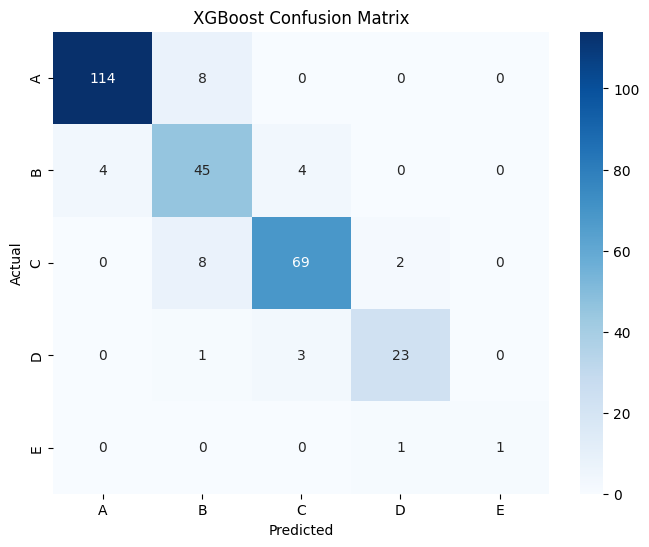

In [ ]:
# XGBoost Results
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=labels))

# Plot Confusion MatrixD
plot_confusion_matrix(y_test, xgb_predictions, title="XGBoost Confusion Matrix", labels=labels)


In [ ]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, xgb_predictions, target_names=labels, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
report_df

,precision,recall,f1-score,support
A,0.966102,0.934426,0.950000,122.000000
B,0.725806,0.849057,0.782609,53.000000
C,0.907895,0.873418,0.890323,79.000000
D,0.884615,0.851852,0.867925,27.000000
E,1.000000,0.500000,0.666667,2.000000
accuracy,0.890459,0.890459,0.890459,0.890459
macro avg,0.896884,0.801750,0.831504,283.000000
weighted avg,0.897316,0.890459,0.892159,283.000000
